<a href="https://colab.research.google.com/github/FerdousJUST/fish-image-classification-using-VGG16-100-acquracy/blob/main/vgg16_project_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [2]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/Shareddrives/Research Collaboration/Image_Classification_Dataset/Training'
valid_path = '/content/drive/Shareddrives/Research Collaboration/Image_Classification_Dataset/Validation'

In [3]:
# add preprocessing layer to the front of VGG
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

58889256/58889256 [==============================] - 0s 0us/step


In [4]:
# don't train existing weights
for layer in vgg.layers:
  layer.trainable = False

In [5]:
  # useful for getting number of classes
folders = glob('/content/drive/Shareddrives/Research Collaboration/Image_Classification_Dataset/Training/*')

In [6]:
# our layers - you can add more if you want
x = Flatten()(vgg.output)
# x = Dense(1000, activation='relu')(x)
prediction = Dense(len(folders), activation='softmax')(x)

In [7]:
# create a model object
model = Model(inputs=vgg.input, outputs=prediction)

In [8]:
# view the structure of the model
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [9]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [10]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory(valid_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 4800 images belonging to 4 classes.
Found 1200 images belonging to 4 classes.


In [11]:
import tensorflow as tf

from keras.models import load_model

model.save('/content/drive/Shareddrives/Research Collaboration/Ferdous MSc Project/part five/vgg16_new_model.h5')

In [ ]:
# fit the model
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=5,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

<ipython-input-12-39a22121036e>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/5
150/150 [==============================] - 3228s 21s/step - loss: 0.3528 - accuracy: 0.8833 - val_loss: 0.1085 - val_accuracy: 0.9725
Epoch 2/5
150/150 [==============================] - 3194s 21s/step - loss: 0.0703 - accuracy: 0.9867 - val_loss: 0.0506 - val_accuracy: 0.9925
Epoch 3/5
150/150 [==============================] - 3206s 21s/step - loss: 0.0374 - accuracy: 0.9950 - val_loss: 0.0394 - val_accuracy: 0.9942
Epoch 4/5
150/150 [==============================] - 3197s 21s/step - loss: 0.0275 - accuracy: 0.9956 - val_loss: 0.0320 - val_accuracy: 0.9950
Epoch 5/5
 61/150 [===========>..................] - ETA: 25:12 - loss: 0.0178 - accuracy: 1.0000

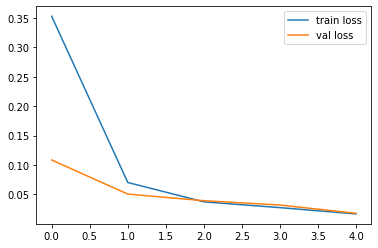

<Figure size 432x288 with 0 Axes>

In [13]:
# loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

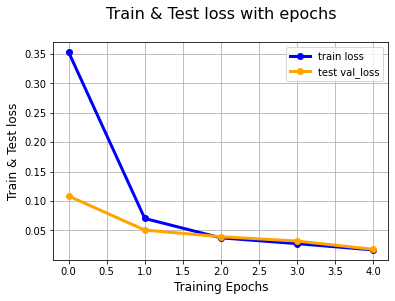

In [16]:
plt.plot(r.history['loss'],'b-o',color = 'blue',label = 'train',linewidth=3.0)
plt.plot(r.history['val_loss'],'b-o',color = 'orange',label = 'train',linewidth=3.0)
plt.grid(True)
epochs = range(1,10)
#plt.legend(['loss', 'val_loss'], loc='upper right')
plt.legend(['train loss', 'test val_loss'], loc='upper right')
plt.title("Train & Test loss with epochs\n",fontsize = 16)
plt.xlabel("Training Epochs",fontsize= 12)
plt.ylabel("Train & Test loss",fontsize =12)
plt.show()

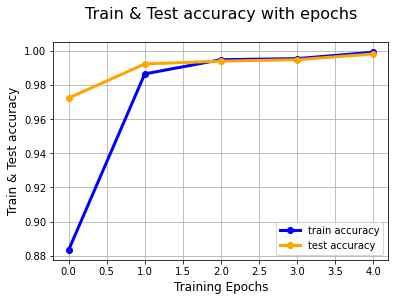

In [17]:
plt.plot(r.history['accuracy'],'b-o',color = 'blue',label = 'train',linewidth=3.0)
plt.plot(r.history['val_accuracy'],'b-o',color = 'orange',label = 'train',linewidth=3.0)
plt.grid(True)
epochs = range(1,10)
#plt.legend(['loss', 'val_loss'], loc='upper right')
plt.legend(['train accuracy', 'test accuracy'], loc='lower right')
plt.title("Train & Test accuracy with epochs\n",fontsize = 16)
plt.xlabel("Training Epochs",fontsize= 12)
plt.ylabel("Train & Test accuracy",fontsize =12)
plt.show()

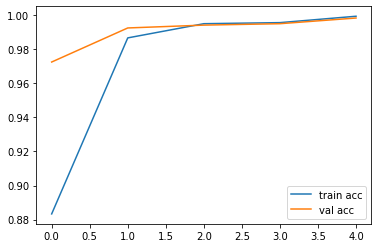

<Figure size 432x288 with 0 Axes>

In [15]:
# accuracies
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [19]:
acc = model.evaluate(valid_path,steps = len(valid_path),verbose = 0)
print('%.2f'%(acc[1]*100))

IndexError: ignored

In [32]:
from tensorflow.python.ops.gen_math_ops import Round
from keras.preprocessing import image
import numpy as np
from keras.utils import load_img, img_to_array
test_image = load_img(
'/content/drive/Shareddrives/Research Collaboration/Image_Classification_Dataset/Training/Barbel_Fish/Barbel_Fish 017.jpg', 
                      target_size = (224,224))
test_image = img_to_array(test_image)
test_image = np.expand_dims(test_image,axis = 0)
rslt = model.predict(test_image)
print (rslt)

if   rslt[0][0] == 1:
        ans = " Barbel Fish "
elif rslt[0][1] == 1:
        ans = "Hilsha Fish "
elif rslt[0][2] == 1:
        ans = "Spotted Snakehead Fish "
elif rslt[0][3] == 1:
        ans = " Tilapia Fish"
print(ans)

1/1 [==============================] - 1s 847ms/step
[[1. 0. 0. 0.]]
 Barbel Fish 


In [33]:
from tensorflow.python.ops.gen_math_ops import Round
from keras.preprocessing import image
import numpy as np
from keras.utils import load_img, img_to_array
test_image = load_img(
'/content/drive/Shareddrives/Research Collaboration/Image_Classification_Dataset/Training/Hilsha_Fish/Hilsha_Fish 012.jpg', 
                      target_size = (224,224))
test_image = img_to_array(test_image)
test_image = np.expand_dims(test_image,axis = 0)
rslt = model.predict(test_image)
print (rslt)

if   rslt[0][0] == 1:
        ans = " Barbel Fish "
elif rslt[0][1] == 1:
        ans = "Hilsha Fish "
elif rslt[0][2] == 1:
        ans = "Spotted Snakehead Fish "
elif rslt[0][3] == 1:
        ans = " Tilapia Fish"
print(ans)

1/1 [==============================] - 1s 529ms/step
[[0. 1. 0. 0.]]
Hilsha Fish 


In [34]:
from tensorflow.python.ops.gen_math_ops import Round
from keras.preprocessing import image
import numpy as np
from keras.utils import load_img, img_to_array
test_image = load_img(
'/content/drive/Shareddrives/Research Collaboration/Image_Classification_Dataset/Training/Spotted_Snakehead_Fish/Spotted_Fish 016.jpg', 
                      target_size = (224,224))
test_image = img_to_array(test_image)
test_image = np.expand_dims(test_image,axis = 0)
rslt = model.predict(test_image)
print (rslt)

if   rslt[0][0] == 1:
        ans = " Barbel Fish "
elif rslt[0][1] == 1:
        ans = "Hilsha Fish "
elif rslt[0][2] == 1:
        ans = "Spotted Snakehead Fish "
elif rslt[0][3] == 1:
        ans = " Tilapia Fish"
print(ans)

1/1 [==============================] - 1s 530ms/step
[[0. 0. 1. 0.]]
Spotted Snakehead Fish 


In [38]:
from tensorflow.python.ops.gen_math_ops import Round
from keras.preprocessing import image
import numpy as np
from keras.utils import load_img, img_to_array
test_image = load_img(
'/content/drive/Shareddrives/Research Collaboration/Image_Classification_Dataset/Training/Tilapia_Fish/Tilapia_Fish 049.png', 
                      target_size = (224,224))
test_image = img_to_array(test_image)
test_image = np.expand_dims(test_image,axis = 0)
rslt = model.predict(test_image)
print (rslt)

if   rslt[0][0] == 1:
        ans = " Barbel Fish "
elif rslt[0][1] == 1:
        ans = "Hilsha Fish "
elif rslt[0][2] == 1:
        ans = "Spotted Snakehead Fish "
elif rslt[0][3] == 1:
        ans = " Tilapia Fish"
print(ans)

1/1 [==============================] - 1s 536ms/step
[[0. 0. 0. 1.]]
 Tilapia Fish


In [40]:
from sklearn.metrics import confusion_matrix,classification_report
import numpy as np
y_pred = model.predict(train_path)
y_pred_classes = [np.argmax(element) for element in y_pred]
print("Classification Report:\n ",classification_report(y_pred_classes,train_path))

IndexError: ignored